<a href="https://colab.research.google.com/github/Haoliang04/JSC270/blob/main/JSC270_2025_Lab1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1: Introduction

In this lab, we will get started with fundamentals for the course, including google colab, python, pandas, matplotlib, and seaborn. Throughout the document there are links to useful resources for all the topics that we cover. Stackoverflow is another great resource for coding questions!

We will go through a lot of the code together.  You will also see some blank cells for exercises to complete on your own.

Before we begin, please fill out this survey about your experience with [Python](https://forms.gle/dNEPdnxAdA8vxAXw8).



## Basic data structures in Python

The following data structures will be essential for the assignments in this course. The python guide to data structures can be found [here](https://docs.python.org/3/tutorial/datastructures.html). This is great to review, even if you already use python often.

In [ ]:
## List
my_list = [1, 2, 3]
my_list_str = ['a','b','c']

In [ ]:
## Dictionary
city_pop_dict = {
    'Toronto': 2.93,
    'New York': 8.399,
    'Chicago': 2.7,
    'Vancouver': 0.675,
    'LA': 3.99,
    'San Francisco': 0.883
}

full_dict = {
    'l': [7,6,5,4,3],
    'm': 4,
    'n': {
        'n_1': 5,
        'n_2': [3,2,1],
        'n_3': {'n_11': 0}
        }
           }


###Accessing elements in lists and dictionaries

In [ ]:
## List: use index
my_list[0]

1

In [ ]:
## Dictionary: use key
print(city_pop_dict.keys())
print(city_pop_dict.values())
print(city_pop_dict['Toronto'])

dict_keys(['Toronto', 'New York', 'Chicago', 'Vancouver', 'LA', 'San Francisco'])
dict_values([2.93, 8.399, 2.7, 0.675, 3.99, 0.883])
2.93


In [ ]:
## Dictionary: index keys
my_keys = list(city_pop_dict.keys())
print(city_pop_dict[my_keys[0]])

2.93


### Exercise: Create a list containing the populations of LA and San Francisco using city_pop_dict.

In [ ]:
## One Solution
california_pops = [city_pop_dict.get('LA'), city_pop_dict.get('San Francisco')]
california_pops

[3.99, 0.883]

In [ ]:
## Another solution with a list comprehension (ie. create a new list with values of another list)
[city_pop_dict.get(k) for k in ['LA', 'San Francisco']]

[3.99, 0.883]

## pandas: A Python data analysis library

* All things pandas can be found [here](https://pandas.pydata.org).
* A helpful [guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for pandas indexing.

In [2]:
## Need to import the pandas library
## Here we use the pseudonym 'pd'
import pandas as pd ## usually want to keep imports together at the beginning of your script

In [3]:
## Make a pandas data frame from a dictionary:

  ## first define the dictionary
df_dict = {
    'id': ['id1','id2','id3','id4','id5','id6'],
    'v1': [1,2,3,4,5,6],
    'v2': ['t','t','f','t','f','f'],
    'v3': [6.3,9.2,3.3,8.9,4.7,7.2],
    'v4': ['t','t','f','t','t','f'],
    'v_date' : pd.date_range(start='2021-01-07',end='2021-01-12'),
}

  ## next define the dataframe
my_df = pd.DataFrame(df_dict, index = df_dict['id'])

In [12]:
## Take a look at your dataframe
my_df

,id,v1,v2,v3,v4,v_date
id1,id1,1,t,6.3,t,2021-01-07
id2,id2,2,t,9.2,t,2021-01-08
id3,id3,3,f,3.3,f,2021-01-09
id4,id4,4,t,8.9,t,2021-01-10
id5,id5,5,f,4.7,t,2021-01-11
id6,id6,6,f,7.2,f,2021-01-12


In [9]:
## Slicing rows numeric ranges (use .iloc)
my_df.iloc[:1] ## 1st row


,id,v1,v2,v3,v4,v_date
id1,id1,1,t,6.3,t,2021-01-07


In [ ]:
## Slicing rows by index values (use .loc)
my_df.loc['id1']

id                        id1
v1                          1
v2                          t
v3                        6.3
v4                          t
v_date    2021-01-07 00:00:00
Name: id1, dtype: object

Why do we need .loc and .iloc? You can slice data frames without them, but the result may not be what you expect, because you have not told python whether to slice explicitly by the index value or not. Here is an example of how this can go wrong, taken from the book *Python Data Science Handbook* by Jake VanderPlas.

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

,0
1,a
3,b
5,c


In [ ]:
data[1] # this gives us the 0th element, not the 1st, because it is using the explicit index 1

'a'

In [ ]:
data[1:3] # however, slicing now uses the implicit indexing in Python, so this now
#gives us the 2nd and 3rd elements, not those with indices 1 and 3

,0
3,b
5,c


In [ ]:
## Slicing columns and rows
  # with .iloc
my_df.iloc[0,0]

  # with .loc
my_df.loc['id1','id1']

Timestamp('2021-01-07 00:00:00')

In [ ]:
## Conditional subsetting, only rows with dates after 2021-01-10
my_df[my_df.v_date > '2021-01-10']

,id,v1,v2,v3,v4,v_date
id5,id5,5,f,4.7,t,2021-01-11
id6,id6,6,f,7.2,f,2021-01-12


In [ ]:
## Conditional subsetting, only rows with dates after 2021-01-10 AND v3 > 7
my_df[(my_df.v_date > '2021-01-10') & (my_df.v3 > 7)]

,id,v1,v2,v3,v4,v_date
id6,id6,6,f,7.2,f,2021-01-12


### Exercise: How many individuals have v1 > 3 and v2 == 'f'?

In [ ]:
 # Have students try the exercise on their own.

In [ ]:
# One solution
my_df[(my_df.v1 > 3) & (my_df.v2 == 'f')]

,id,v1,v2,v3,v4,v_date
id5,id5,5,f,4.7,t,2021-01-11
id6,id6,6,f,7.2,f,2021-01-12


In [ ]:
# Introduce shape
my_df[(my_df.v1 > 3) & (my_df.v2 == 'f')].shape[0] # number of rows produced by this statement

2

In [ ]:
# Another solution
my_df.query("v2 == 'f' & v1 > 3")

,id,v1,v2,v3,v4,v_date
id5,id5,5,f,4.7,t,2021-01-11
id6,id6,6,f,7.2,f,2021-01-12


###Different pandas built-ins

In [ ]:
## Summarize your columns
my_df.describe() ## notice only numeric columns are summarized

,v1,v3,v_date
count,6.000000,6.00000,6
mean,3.500000,6.60000,2021-01-09 12:00:00
min,1.000000,3.30000,2021-01-07 00:00:00
25%,2.250000,5.10000,2021-01-08 06:00:00
50%,3.500000,6.75000,2021-01-09 12:00:00
75%,4.750000,8.47500,2021-01-10 18:00:00
max,6.000000,9.20000,2021-01-12 00:00:00
std,1.870829,2.32379,NaN


In [ ]:
## Find missing values
my_df.v2.isna()

,v2
id1,False
id2,False
id3,False
id4,False
id5,False
id6,False


In [ ]:
# Summarize groups with a given statistic (eg.the sum, mean, median, etc.)
my_groups = my_df.groupby(['v2','v4']).mean(numeric_only=True)
my_groups

v1        v3
v2 v4                    
f  f   4.500000  5.250000
   t   5.000000  4.700000
t  t   2.333333  8.133333

In [ ]:
## Convert data frame from wide to long
my_df.melt(value_vars=['v1','v3'],id_vars=['id','v2','v4','v_date'])

,id,v2,v4,v_date,variable,value
0,id1,t,t,2021-01-07,v1,1.0
1,id2,t,t,2021-01-08,v1,2.0
2,id3,f,f,2021-01-09,v1,3.0
3,id4,t,t,2021-01-10,v1,4.0
4,id5,f,t,2021-01-11,v1,5.0
5,id6,f,f,2021-01-12,v1,6.0
6,id1,t,t,2021-01-07,v3,6.3
7,id2,t,t,2021-01-08,v3,9.2
8,id3,f,f,2021-01-09,v3,3.3
9,id4,t,t,2021-01-10,v3,8.9


## Matplotlib: Visualization in Python

* All things Matplotlib can be found [here](https://matplotlib.org)
* An introduction can be found [here](https://matplotlib.org/tutorials/introductory/pyplot.html)


In [14]:
## Import the library as 'plt'
import matplotlib.pyplot as plt

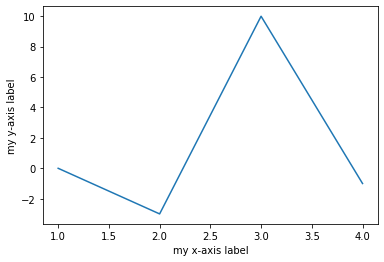

In [ ]:
## Create a simple plot
plt.plot([1,2,3,4],[0,-3,10,-1])
plt.ylabel('my y-axis label')
plt.xlabel('my x-axis label')
plt.show()

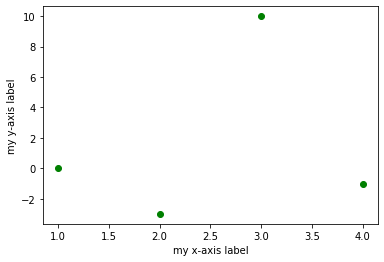

In [ ]:
## Let's make the plot into green points instead of lines
plt.plot([1,2,3,4],[0,-3,10,-1],'go')
plt.ylabel('my y-axis label')
plt.xlabel('my x-axis label')
plt.show()

A list of markers and colors can be found at the bottom of this [page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

### Exercise: Make a simple plot of your own.

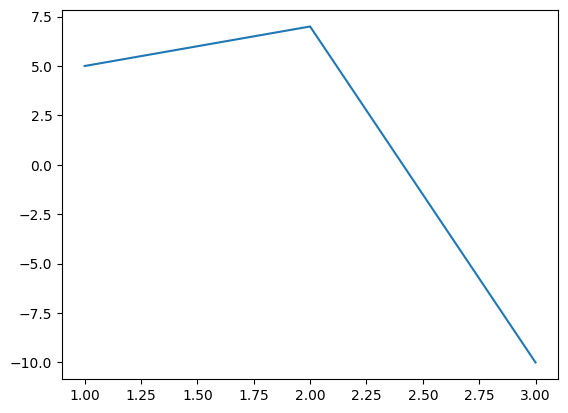

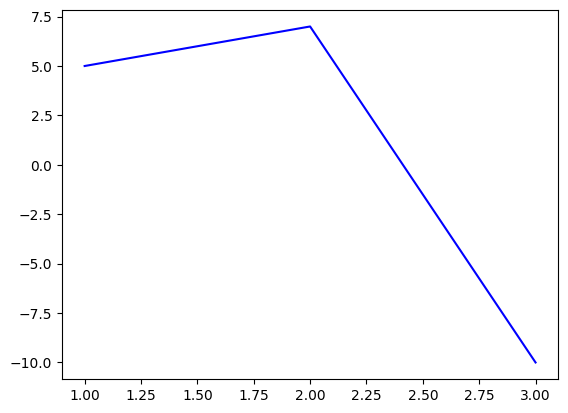

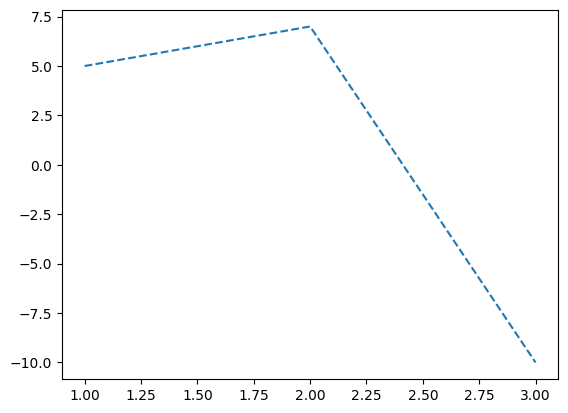

In [19]:
## Example

# Simple solution
plt.plot([1,2,3], [5,7,-10])
plt.show() # will remove the line of code

# Change color
plt.plot([1,2,3], [5,7,-10], 'b')
plt.show()

# Dashed line
plt.plot([1,2,3], [5,7,-10], '--')
plt.show()

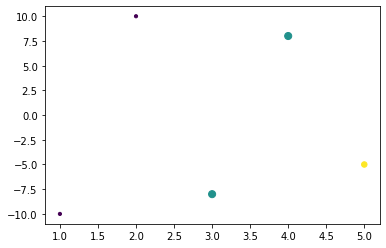

In [ ]:
## You can also plot, referencing data from a dictionary
## Let's make a super simple one to see how

plot_dict = {
    'x_vals': [1,2,3,4,5],
    'y_vals': [-10,10,-8,8,-5],
    'colors': [1,1,2,2,3],
    'sizes': [10, 10, 50, 50, 30]
}

plt.scatter(x='x_vals', y= 'y_vals', c='colors', s='sizes', data=plot_dict)
plt.show()

### Exercise: Make a scatter plot of v3 vs v1 from our df_dict. Color the points by v1 and size the points according to v3.

In [ ]:
## Solution
plt.scatter('v1', 'v3', c='v1', s='v3', data = df_dict)
plt.show()

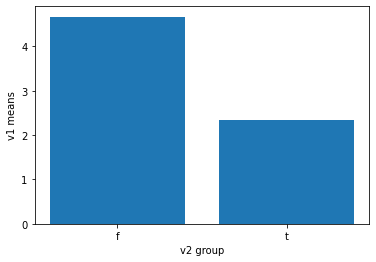

In [ ]:
## Let's plot the means from v1 for each of the v2 groups

my_v2_means = my_df.groupby(['v2']).mean()
my_v2_means ## this can be treated like a dataframe

plt.bar(my_v2_means.index, my_v2_means.v1)
plt.xlabel('v2 group')
plt.ylabel('v1 means')
plt.show()

## seaborn: Statistical data visualization in Python

* All things seaborn can be found [here](https://seaborn.pydata.org/).
* An introduction can be found [here](https://seaborn.pydata.org/introduction.html).

In [ ]:
import seaborn as sns

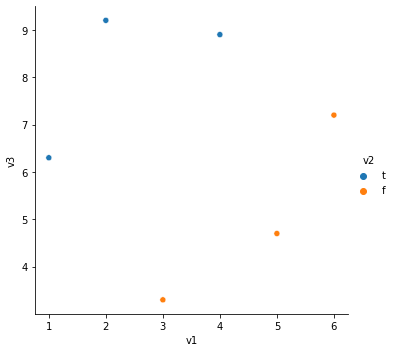

In [ ]:
## Create a plot of v3 vs v1, colored by v2 in our dataframe

sns.relplot(data=my_df, x='v1', y='v3', hue='v2')
plt.show()

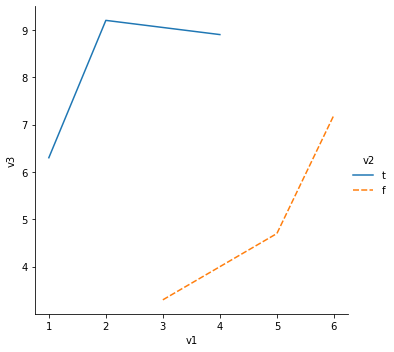

In [ ]:
## Change it to a line plot, style='v2' will make the lines different styles

sns.relplot(data=my_df, x='v1', y='v3', hue='v2', style='v2', kind="line")

### Exercise: Create a line plot of v_date vs v3, colored and styled by v4.



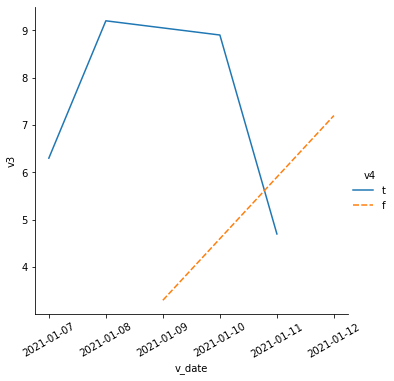

In [ ]:
## Solution
myplt = sns.relplot(data=my_df, x='v_date', y='v3', hue='v4', style='v4', kind="line")
myplt.set_xticklabels(rotation=30)
## note that you can rotate the tick labels using this procedure
## From: https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot)
## Stack is very helpful for your coding questions!